# Product Detection in Grocerry Shops Shelves

### Problem Statement - Given a grocery shop image we have to detect which part of image contains the product and how many product contains in the image , we show the product by using the bounding boxes

### Dataset overview:
### Data Form : JPG Image Files
#### features - Images of shelves from grocerry stores
#### ground truth : annotations of image
### image properties:
The naming is as follows:

			"C<c>_P<p>_N<n>_S<s>_<i>.JPG"
			where
				<c> := camera id (1: iPhone5S, 2: iPhone4, 3: Sony Cybershot, 4: Nikon Coolpix)
				<p> := planogram id
				<n> := the rank of the top shelf on the image according to the planogram
				<s> := number of shelves on the image
				<i> := copy number

# Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from cv2 import imread, resize, imwrite
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img
import glob
import json
import random
from random import sample 

%matplotlib inline

In [ ]:
import urllib.request

url = "https://storage.googleapis.com/open_source_datasets/ShelfImages.tar.gz"

downloaded_filename = 'ShelfImages.tar.gz'

urllib.request.urlretrieve(url, downloaded_filename)

('ShelfImages.tar.gz', <http.client.HTTPMessage at 0x7f02dd83d610>)

In [ ]:
import tarfile

fname = downloaded_filename

if fname.endswith("tar.gz"):

    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()

In [ ]:
from zipfile import ZipFile
ZipFile("/content/grocerydataset-master.zip").extractall()

In [ ]:
from os import listdir
from os.path import isfile, join
TrainPath="/content/ShelfImages/train"
TestPath="/content/ShelfImages/test"
train_file_names = [f for f in listdir(TrainPath) if isfile(join(TrainPath, f))]
test_file_names = [f for f in listdir(TestPath) if isfile(join(TestPath, f))]

In [ ]:
print("train_row_count : " , len(train_file_names))
print("test_row_count : " , len(test_file_names))

train_row_count :  283
test_row_count :  71


### Printing Random Image from data

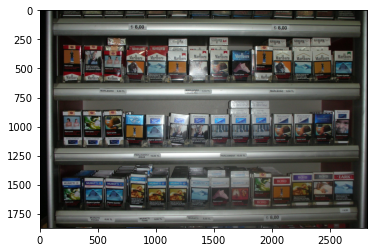

In [ ]:
image_name=random.choice(train_file_names)
img=mpimg.imread(TrainPath+'/' + image_name)
imgplot = plt.imshow(img) 

## Drawing Bounding Box at random image

Number of Products: 42


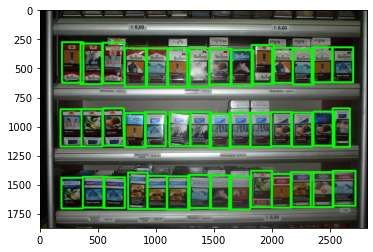

In [ ]:
import cv2
f = open("/content/grocerydataset-master/annotation.txt", "r")
annot = []
for i in f:
    if i.split()[0] == image_name:
            annot = i.split()[2:]
            break

color = (0, 255,0 ) 
thickness = 15
print("Number of Products:" , len(annot)//5)

for i in range(0,len(annot) , 5):
    x = int(annot[i])
    y = int(annot[i+1])
    w = int(annot[i+2])
    h = int(annot[i+3])
    b = annot[i+4]
    img = cv2.rectangle(img ,(x,y) , (x+w , y+h) ,color , thickness)
imgplot = plt.imshow(img)

## Average Number of Shelve in Image

In [ ]:
shelve_counts = []
for i in train_file_names:
    count = int(i.split('_')[-2][1:])
    shelve_counts.append(count)
    
print("Average Number of Shelves in Image" , sum(shelve_counts)/len(shelve_counts))

Average Number of Shelves in Image 3.243816254416961


## Histogram of Number of Shelve

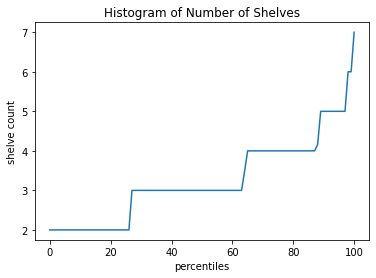

In [ ]:
import matplotlib.pyplot as plt
percentiles = [np.percentile(shelve_counts,i) for i in range(0,101 , 1)]
plt.plot(range(0,101,1) , percentiles)
plt.title("Histogram of Number of Shelves")
plt.xlabel("percentiles")
plt.ylabel("shelve count")
plt.show()

## Average Number of Products in Image

In [ ]:
products_count = []
f = open("/content/grocerydataset-master/annotation.txt", "r")

for i in f:
    number = int(i.split()[1])
    products_count.append(number)

print("Average Number of Products in Image" , sum(products_count)/len(products_count))

Average Number of Products in Image 37.24293785310734


## Histogram of Number of Products

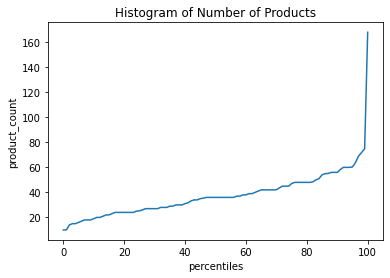

In [ ]:
import matplotlib.pyplot as plt
percentiles = [np.percentile(products_count,i) for i in range(0,101 , 1)]
plt.plot(range(0,101,1) , percentiles)
plt.title("Histogram of Number of Products")
plt.xlabel("percentiles")
plt.ylabel("product_count")
plt.show()

## Number of images Captured using each Camera

In [ ]:
cameras_dict = {1:0 , 2:0 , 3:0 , 4:0}
for i in train_file_names:
    id = int( i.split('_')[ 0 ][ 1: ] )
    cameras_dict[id] += 1

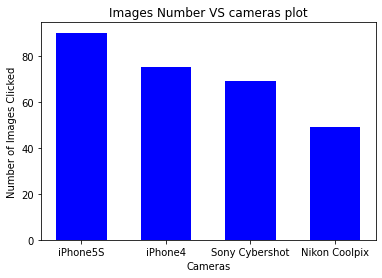

In [ ]:
plt.title("Images Number VS cameras plot")
plt.ylabel("Number of Images Clicked")
plt.xlabel("Cameras")
plt.bar(['iPhone5S', 'iPhone4','Sony Cybershot','Nikon Coolpix']  ,cameras_dict.values(), color ='blue',  
        width = 0.6)
plt.show()

# Creating Input PipeLine

In [ ]:
!pip install pillow
!pip install lxml
!pip install Cython
!pip install jupyter
!pip install matplotlib
!pip install pandas
!pip install opencv-python
!pip install tensorflow

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWjRHUsTaFCwfigWP2_Z6caMmQdT1rD4CRyhTYTImv22mY5VYr4Dt_8
Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


In [ ]:
mkdir /content/gdrive/MyDrive/tf2

mkdir: cannot create directory ‘/content/gdrive/MyDrive/tf2’: File exists


In [ ]:
%cd /content/gdrive/MyDrive/tf2
!git clone https://github.com/tensorflow/models/
%cd /content/gdrive/MyDrive/tf2/models/research/object_detection

/content/gdrive/MyDrive/tf2
fatal: destination path 'models' already exists and is not an empty directory.
/content/gdrive/MyDrive/tf2/models/research/object_detection


In [ ]:
!mkdir trainin
!mkdir inference_graph
!mkdir -p images\train
!mkdir -p images\test

mkdir: cannot create directory ‘trainin’: File exists
mkdir: cannot create directory ‘inference_graph’: File exists


In [ ]:
%cd /content/gdrive/MyDrive/tf2/

/content/gdrive/MyDrive/tf2


## Moving All image Files to train and Test Folder
* Move the Train Images to Images/train
* Move the test Images to Images/test

In [ ]:
%ls models

AUTHORS     community/       ISSUES.md  official/  README.md
CODEOWNERS  CONTRIBUTING.md  LICENSE    orbit/     research/


In [ ]:
%mkdir models/research/object_detection/images
%mkdir models/research/object_detection/images/train
%mkdir models/research/object_detection/images/test

In [ ]:
import glob
import os
import shutil
trainset = train_file_names.copy()
testset = test_file_names.copy()
i = 0
for fileName in trainset + testset:
  if fileName in trainset:
    shutil.copyfile(TrainPath+'/'+fileName ,"models/research/object_detection/images/train/" + fileName)
  else:
    shutil.copyfile(TestPath+'/'+fileName ,"models/research/object_detection/images/test/" + fileName)

## Creating the train_labels and test_labels
* First We will create a dictionary where keys will be image and values will be annotations
* Create train_labels.csv and test_labels.csv containing the Below columns:
<br>
filename' , 'width' , 'class'  , 'height' , 'xmin' , 'xmax' , 'ymin'  , 'ymax'

In [ ]:
f = open("/content/grocerydataset-master/annotation.txt", "r")
annotations_dict = {}
for i in f:
    file_name = i.split()[0]
    rest = i.split()[2:]
    annotations_dict[file_name] = rest

In [ ]:
import pandas as pd
## for Training Set
di_train = {'filename':[] , 'width':[] , 'class':[]  , 'height':[] , 'xmin':[] , 'xmax':[] , 'ymin':[]  , 'ymax':[] }
for fname in trainset:
    for i in range(0, len(annotations_dict[fname]) , 5):
        x = annotations_dict[fname][i] ; y = annotations_dict[fname][i + 1] 
        
        w = annotations_dict[fname][i + 2] ; h = annotations_dict[fname][i + 3]
        
        x = int(x); y = int(y) ; w = int(w) ; h = int(h)
        
        di_train['filename'].append(fname)
        di_train['width'].append(w)
        di_train['class'].append("Product")
        di_train['height'].append(h)
        di_train['xmin'].append(x)
        
        di_train['xmax'].append(x+w)
        di_train['ymin'].append(y)
        di_train['ymax'].append(y+h)
        
df_train = pd.DataFrame(di_train)
df_train.to_csv("models/research/object_detection/images/train_labels.csv")

di_test = {'filename':[] , 'width':[] , 'class':[]  , 'height':[] , 'xmin':[] , 'xmax':[] , 'ymin':[]  , 'ymax':[] }

for fname in testset:
    for i in range(0, len(annotations_dict[fname]) , 5):
        x = annotations_dict[fname][i] ; y = annotations_dict[fname][i + 1] 
        w = annotations_dict[fname][i + 2] ; h = annotations_dict[fname][i + 3]
        x = int(x); y = int(y) ; w = int(w) ; h = int(h)
        
        di_test['filename'].append(fname)
        di_test['width'].append(w)
        di_test['class'].append("Product")
        di_test['height'].append(h)
        di_test['xmin'].append(x)
        di_test['xmax'].append(x+w)
        di_test['ymin'].append(y)
        di_test['ymax'].append(y+h)

df_test = pd.DataFrame(di_test)

df_test.to_csv("models/research/object_detection/images/test_labels.csv")

In [ ]:
df_train.head()

,filename,width,class,height,xmin,xmax,ymin,ymax
0,C3_P03_N1_S2_2.JPG,348,Product,448,3212,3560,1404,1852
1,C3_P03_N1_S2_2.JPG,312,Product,392,3316,3628,484,876
2,C3_P03_N1_S2_2.JPG,348,Product,448,3488,3836,1420,1868
3,C3_P03_N1_S2_2.JPG,312,Product,392,3628,3940,488,880
4,C3_P03_N1_S2_2.JPG,348,Product,448,3820,4168,1392,1840


In [ ]:
df_test.head()

,filename,width,class,height,xmin,xmax,ymin,ymax
0,C1_P12_N1_S5_1.JPG,172,Product,332,1080,1252,688,1020
1,C1_P12_N1_S5_1.JPG,172,Product,236,1084,1256,236,472
2,C1_P12_N1_S5_1.JPG,172,Product,296,1088,1260,1636,1932
3,C1_P12_N1_S5_1.JPG,172,Product,280,1092,1264,1196,1476
4,C1_P12_N1_S5_1.JPG,188,Product,296,1100,1288,2124,2420
